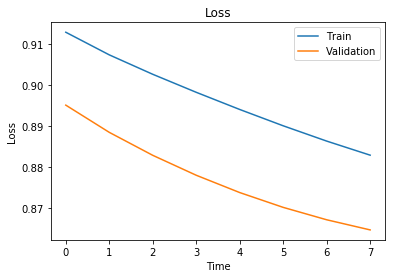

In [5]:
# -*- coding: UTF-8 -*-
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

def sigmoid(X):
    return 1.0/(1+exp(-X))

data = load_svmlight_file("D:\\data2.txt")
X, Y = data[0], data[1]

data_num,att_num = shape(X)
t_size=0.33
validation_num=int(ceil(data_num*t_size))
train_num=data_num-validation_num

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=t_size, random_state=50)
Xt=mat(X_train.toarray())
Xv=mat(X_validation.toarray())
Yt=mat(Y_train).T
Yv=mat(Y_validation).T

times=8
lossT=[]
lossV=[]

learningRate = 0.001
w= ones((att_num,1))

for k in range(times):       
    hT = sigmoid(Xt*w)
    tempT = Yt - hT
    lossT.append(np.float64((tempT.T)*tempT)/train_num)    
    hV=sigmoid(Xv*w)
    tempV = (Yv - hV)
    lossV.append(np.float64((tempV.T) * tempV)/validation_num)       
    w += learningRate * Xt.T* tempT

x=np.arange(0,times)
plt.plot(x,lossT,label="Train")
plt.plot(x,lossV,label="Validation")
plt.title(u"Loss")
plt.legend()#Places a legend on the axes
plt.xlabel(u"Time")
plt.ylabel(u"Loss")
plt.show()

